In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [5]:
df = pd.read_csv("Iris_extended.csv")

In [6]:
X = df.drop(columns=["Species"])
y = df["Species"]

In [7]:
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [10]:
baseline_mlp = MLPClassifier(random_state=42, max_iter=500)
baseline_mlp.fit(X_train, y_train)
y_pred_baseline = baseline_mlp.predict(X_test)
baseline_acc = accuracy_score(y_test, y_pred_baseline)

print("Accuracy (before tuning):", baseline_acc)

Accuracy (before tuning): 0.98


In [11]:
param_grid = {
    "hidden_layer_sizes": [(8,), (16,), (32,), (16,8), (32,16)],  
    "activation": ["relu", "tanh", "logistic"],   
    "solver": ["adam", "sgd"],                   
    "learning_rate_init": [0.001, 0.01, 0.1],    
    "max_iter": [500]
}

In [12]:
mlp = MLPClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (8,), 'learning_rate_init': 0.1, 'max_iter': 500, 'solver': 'adam'}
Best CV Accuracy: 0.99


In [13]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
best_acc = accuracy_score(y_test, y_pred_best)

print("Test Accuracy After Tuning:", best_acc)

Test Accuracy After Tuning: 1.0


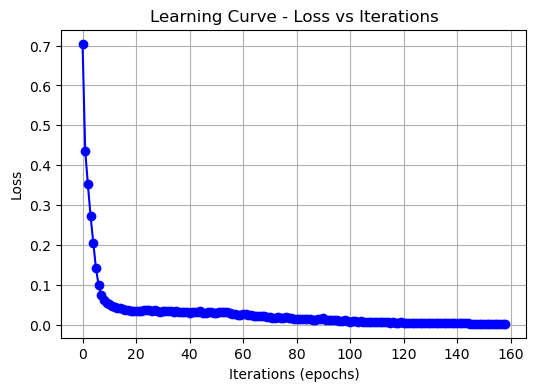

In [14]:
import matplotlib.pyplot as plt

best_model = grid_search.best_estimator_

plt.figure(figsize=(6,4))
plt.plot(best_model.loss_curve_, marker="o", color="blue")
plt.title("Learning Curve - Loss vs Iterations")
plt.xlabel("Iterations (epochs)")
plt.ylabel("Loss")
plt.grid(True)
plt.show()



In [19]:
import pickle

with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)
